In [153]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from branca.element import Figure
import folium
from folium.plugins import HeatMap

In [154]:
# Setting default seaborn parameters

sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    }) 

In [155]:
def convert_to_k(ax):
    '''Function for converting ylabels count from thousands to k'''
    ylabels = ["{:,.0f}".format(y) + "K" for y in ax.get_yticks() / 1000]
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ylabels)

In [156]:
# Loading the trip dataset

td = pd.read_csv('data/2011-2012-trip-data.csv')

In [157]:
td.shape

(3255678, 9)

In [158]:
td.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [159]:
# Checking for NaN values

td.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [160]:
# Lowercasing the column names

td.columns = td.columns.str.lower()

In [161]:
# Count of 'Unknown' users

td.loc[td['member type'] == 'Unknown'].value_counts().count()

21

In [162]:
# Convert date to pandas datetime format

td['start date'] = pd.to_datetime(td['start date'])
td['end date'] = pd.to_datetime(td['end date'])

In [163]:
# Convert member typy to categorical format

td['member type'] = pd.Categorical(td['member type'], categories=["Casual", "Member", "Unknown"])

In [164]:
td.dtypes

duration                         int64
start date              datetime64[ns]
end date                datetime64[ns]
start station number             int64
start station                   object
end station number               int64
end station                     object
bike number                     object
member type                   category
dtype: object

<Axes: xlabel='member type', ylabel='count'>

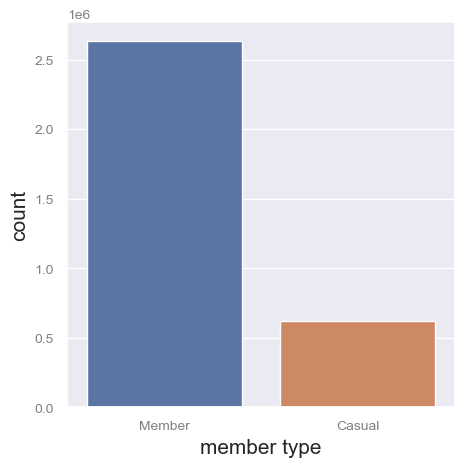

In [165]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(data=td, x='member type', order=["Member", "Casual"])

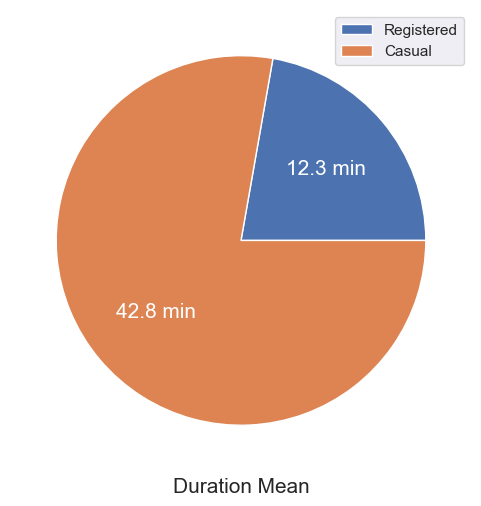

In [166]:
labels = ["Registered", "Casual"]
duration = [
    td[td["member type"] == "Member"]["duration"].mean() / 60,
    td[td["member type"] == "Casual"]["duration"].mean() / 60,
]

fig, ax = plt.subplots(figsize=(6, 6))
p, tx, autotexts = plt.pie(duration, autopct="", textprops={"fontsize": 15, "color": "w"})
for i, a in enumerate(autotexts):
    a.set_text("{} min".format(round(duration[i], 1)))
plt.legend(labels=labels)
plt.xlabel("Duration Mean")
plt.show()

In [167]:
# Top 10 starting stations and ending stations

top10_ss = td['start station'].value_counts().head(10).reset_index()
top10_ss.columns = ['start station', 'counts']
top10_es = td['end station'].value_counts().head(10).reset_index()
top10_es.columns = ['end station', 'counts']

In [168]:
# Top 10 starting stations and ending stations for casual users

top10_ss_c = td[td['member type'] == 'Casual']['start station'].value_counts().head(10).reset_index()
top10_ss_c.columns = ['start station', 'counts']
top10_es_c = td[td['member type'] == 'Casual']['end station'].value_counts().head(10).reset_index()
top10_es_c.columns = ['end station', 'counts']

In [169]:
# Top 10 starting stations and ending stations for members

top10_ss_r = td[td['member type'] == 'Member']['start station'].value_counts().head(10).reset_index()
top10_ss_r.columns = ['start station', 'counts']
top10_es_r = td[td['member type'] == 'Member']['end station'].value_counts().head(10).reset_index()
top10_es_r.columns = ['end station', 'counts']

In [170]:
display(top10_ss_r)
display(top10_es_r)

,start station,counts
0,Massachusetts Ave & Dupont Circle NW,85223
1,Columbus Circle / Union Station,68023
2,15th & P St NW,64285
3,17th & Corcoran St NW,57301
4,Adams Mill & Columbia Rd NW,55241
5,14th & V St NW,52065
6,New Hampshire Ave & T St NW,50473
7,Eastern Market Metro / Pennsylvania Ave & 7th ...,47479
8,20th St & Florida Ave NW,43683
9,16th & Harvard St NW,43191


,end station,counts
0,Massachusetts Ave & Dupont Circle NW,96230
1,15th & P St NW,73825
2,Columbus Circle / Union Station,68271
3,17th & Corcoran St NW,61073
4,14th & V St NW,53630
5,New Hampshire Ave & T St NW,52187
6,Adams Mill & Columbia Rd NW,46254
7,Eastern Market Metro / Pennsylvania Ave & 7th ...,45251
8,14th & Rhode Island Ave NW,44652
9,21st & I St NW,44362


In [171]:
display(top10_ss_c)
display(top10_es_c)

,start station,counts
0,19th St & Constitution Ave NW,23508
1,Massachusetts Ave & Dupont Circle NW,21938
2,Jefferson Dr & 14th St SW,19710
3,10th St & Constitution Ave NW,17423
4,USDA / 12th & Independence Ave SW,17143
5,C & O Canal & Wisconsin Ave NW,14760
6,New York Ave & 15th St NW,13306
7,7th & F St NW / National Portrait Gallery,12457
8,Smithsonian-National Mall / Jefferson Dr & 12t...,12451
9,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,12271


,end station,counts
0,19th St & Constitution Ave NW,23442
1,Massachusetts Ave & Dupont Circle NW,22477
2,USDA / 12th & Independence Ave SW,20731
3,Jefferson Dr & 14th St SW,19064
4,10th St & Constitution Ave NW,18364
5,C & O Canal & Wisconsin Ave NW,17229
6,New York Ave & 15th St NW,15032
7,Georgetown Harbor / 30th St NW,14123
8,Smithsonian-National Mall / Jefferson Dr & 12t...,12463
9,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,12443


In [172]:
display(top10_ss)
display(top10_es)

,start station,counts
0,Massachusetts Ave & Dupont Circle NW,107162
1,Columbus Circle / Union Station,77750
2,15th & P St NW,73707
3,17th & Corcoran St NW,63502
4,Adams Mill & Columbia Rd NW,62378
5,14th & V St NW,58356
6,Eastern Market Metro / Pennsylvania Ave & 7th ...,56029
7,New Hampshire Ave & T St NW,55812
8,14th & Rhode Island Ave NW,50142
9,20th St & Florida Ave NW,49812


,end station,counts
0,Massachusetts Ave & Dupont Circle NW,118707
1,15th & P St NW,83457
2,Columbus Circle / Union Station,79681
3,17th & Corcoran St NW,67382
4,14th & V St NW,59658
5,New Hampshire Ave & T St NW,57145
6,8th & H St NW,54811
7,21st & I St NW,54259
8,Eastern Market Metro / Pennsylvania Ave & 7th ...,54070
9,Adams Mill & Columbia Rd NW,52546


In [173]:
# Read Capital Bikeshare Station Locations data

gd = pd.read_excel('data/geodata.xlsx')
gd = gd.iloc[:, 1:]

In [174]:
gd

,location,start station
0,"(38.8972217, -77.019347)",5th & F St NW
1,"(38.9267997, -77.0322)",14th & Harvard St NW
2,"(38.9366935, -77.0241778)",Georgia & New Hampshire Ave NW
3,"(38.91711546315044, -77.02599642535804)",10th & U St NW
4,"(38.9230634, -77.0425361)",Adams Mill & Columbia Rd NW
...,...,...
189,"(38.8054518, -77.0504514)",King St & Patrick St
190,"(38.8114557, -77.050276)",Henry St & Pendleton St
191,"(38.889335, -77.0777248)",Arlington Blvd & N Queen St
192,"(38.8848997, -77.0879448)",Barton St & 10th St N


In [175]:
# Matching the locations from the Station locations data with the individual trip data

ttd = pd.merge(td, gd, on='start station', how='inner')


In [176]:
# Matching the top 10 start stations names for casual and registered user with their locations

tsc = pd.merge(gd, top10_ss_c, on='start station', how='inner')
tsr = pd.merge(gd, top10_ss_r, on='start station', how='inner')

# The intersect between the two tops
tss_both = pd.merge(tsc, tsr, on='location', how='inner')

In [177]:
# Changing the column name to match with "end station"

gde = gd.rename(columns={'start station': 'end station'})

In [178]:
gde

,location,end station
0,"(38.8972217, -77.019347)",5th & F St NW
1,"(38.9267997, -77.0322)",14th & Harvard St NW
2,"(38.9366935, -77.0241778)",Georgia & New Hampshire Ave NW
3,"(38.91711546315044, -77.02599642535804)",10th & U St NW
4,"(38.9230634, -77.0425361)",Adams Mill & Columbia Rd NW
...,...,...
189,"(38.8054518, -77.0504514)",King St & Patrick St
190,"(38.8114557, -77.050276)",Henry St & Pendleton St
191,"(38.889335, -77.0777248)",Arlington Blvd & N Queen St
192,"(38.8848997, -77.0879448)",Barton St & 10th St N


In [179]:
# Matching the top 10 start stations names for casual and registered user with their locations

tec = pd.merge(gde, top10_es_c, on='end station', how='inner')
ter = pd.merge(gde, top10_es_r, on='end station', how='inner')
# The intersect between the two tops
tes_both = pd.merge(tec, ter, on='location', how='inner')

In [180]:
tes_both

,location,end station_x,counts_x,end station_y,counts_y
0,"(38.9081498, -77.0383613)",Massachusetts Ave & Dupont Circle NW,22477,Massachusetts Ave & Dupont Circle NW,96230


In [181]:
tss_both

,location,start station_x,counts_x,start station_y,counts_y
0,"(38.9081498, -77.0383613)",Massachusetts Ave & Dupont Circle NW,21938,Massachusetts Ave & Dupont Circle NW,85223


In [182]:
# Function for converting location string data to a list of [lat, long] 

def get_loc(l):
    return list(map(float, l[1:-1].split(', ')))

In [183]:
# Converting location string data to 2 new float columns - lat & long 

for i, r in gd.iterrows():
    gd.loc[i, 'lat'] = float(gd.loc[i, 'location'][1:-1].split(', ')[0])
    gd.loc[i, 'long'] = float(gd.loc[i, 'location'][1:-1].split(', ')[1])

In [184]:
# Plotting all the station locations on the map

fig = Figure(width=1000, height=1000)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)
for l in gd['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="orange")).add_to(washington)

fig.add_child(washington)

In [185]:
# The heatmap of the station locations

fig = Figure(width=800, height=600)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)

head_data = list(zip(gd['lat'], gd['long']))

HeatMap(head_data).add_to(washington)
fig.add_child(washington)

In [186]:
# The map of top 10 ending stations for casual and registered users

fig = Figure(width=1000, height=1000)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)
for l in tec['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="orange")).add_to(washington)
for l in ter['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="blue")).add_to(washington)
for l in tss_both['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="red")).add_to(washington)

fig.add_child(washington)

In [187]:
# The map of top 10 starting stations for casual and registered users

fig = Figure(width=1000, height=1000)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)
for l in tsc['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="orange")).add_to(washington)
for l in tsr['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="blue")).add_to(washington)
for l in tss_both['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="red")).add_to(washington)
fig.add_child(washington)